In [1]:
import h5py
import numpy 
import pylab as mplot
%pylab inline
import astropy.io.fits as pf
import healpy as hp

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


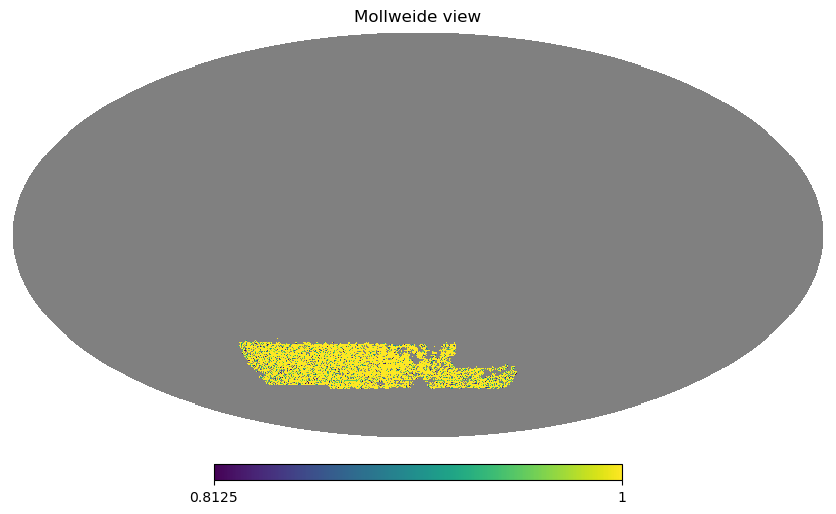

In [2]:
mask = hp.read_map('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y1/DES_Y1A1_3x2pt_redMaGiC_MASK_HPIX4096RING.fits')
hp.mollview(mask)

mask_128 = hp.ud_grade(mask, 128)

In [3]:
pixel = np.arange(len(mask_128))

# not_nan = (mask_512>0)
# pixel = pixel[not_nan]
# mask_512 = mask_512[not_nan]

In [48]:
with h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y1/mask_desy1.h5', 'w') as f:

    f.create_group("provenance")
    f.create_group("maps")
    f.create_group("maps/mask")

    f['maps/mask/pixel'] = pixel.copy()
    f['maps/mask/value'] = mask_128.copy()
    f['maps/mask'].attrs['area'] = len(mask_128[mask_128>0])/len(mask_128)/np.pi/4*(180.0/np.pi)**2
    f['maps/mask'].attrs['aux_lens_maps'] = '/global/cscratch1/sd/chihway/TXPipe/data/desy1/outputs/aux_lens_maps.hdf5'
    f['maps/mask'].attrs['bright_obj_threshold'] = 15.0
    f['maps/mask'].attrs['chunk_rows'] = 1000000
    f['maps/mask'].attrs['config'] = '/global/cscratch1/sd/chihway/TXPipe/examples/desy1/pipeline_cc.yml'
    f['maps/mask'].attrs['cprofile'] = ''
    f['maps/mask'].attrs['depth_band'] = 'i'
    f['maps/mask'].attrs['f_sky'] = len(mask_128[mask_128>0])/len(mask_128)
    f['maps/mask'].attrs['lens_maps'] = '/global/cscratch1/sd/chihway/TXPipe/data/desy1/outputs/lens_maps.hdf5' 
    f['maps/mask'].attrs['memmon'] = 0
    f['maps/mask'].attrs['mpi'] = True
    f['maps/mask'].attrs['name'] = 'TXAuxiliaryLensMaps'
    f['maps/mask'].attrs['nest'] = False
    f['maps/mask'].attrs['npix'] = len(mask_128)
    f['maps/mask'].attrs['pdb'] = False
    f['maps/mask'].attrs['photometry_catalog'] = '/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y1/photometry_catalog_desy1_RM.h5/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y1/photometry_catalog_desy1_RM.h5'
    f['maps/mask'].attrs['snr_delta'] = 1.0
    f['maps/mask'].attrs['snr_threshold'] = 10.0
    f['maps/mask'].attrs['sparse'] = True
    f['maps/mask'].attrs['stage_name'] = 'TXAuxiliaryLensMaps'
    f['maps/mask'].attrs['pixelization'] = 'healpix'
    f['maps/mask'].attrs['nside'] = 128
    
    


In [32]:
with h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y1/mask_desy1.h5') as f:
    print(f['maps/mask'].keys())
    
    test_mask = np.zeros(hp.nside2npix(128))
    test_mask[np.array(f['maps/mask/pixel'])] = np.array(f['maps/mask/value'])


<KeysViewHDF5 ['pixel', 'value']>


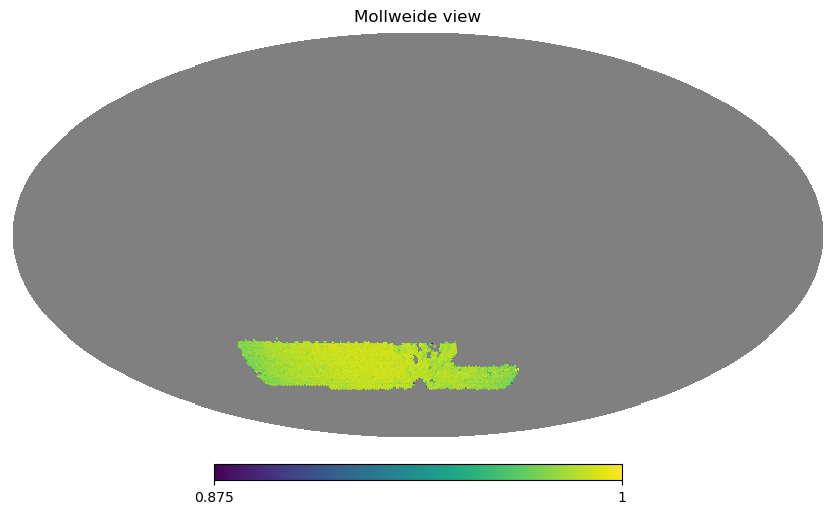

In [33]:
hp.mollview(test_mask)

In [31]:
# !ls /global/cfs/cdirs/lsst/groups/WL/projects/star-challenge/cosmodc2/TXPipe-full-output

In [44]:
with h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/star-challenge/cosmodc2/TXPipe-full-output/mask.hdf5') as f:
    print(f['maps/mask/pixel'])
    print(f['maps/mask'].keys())
    
    test_mask = np.zeros(hp.nside2npix(4096))
    test_mask[np.array(f['maps/mask/pixel'])] = np.array(f['maps/mask/value'])
    print(dict(f['maps/mask'].attrs))

<HDF5 dataset "pixel": shape (2137335,), type "<i8">
<KeysViewHDF5 ['pixel', 'value']>
{'area': 437.95207109067604, 'aux_lens_maps': 'data/star-challenge/outputs/Sep14//aux_lens_maps.hdf5', 'bright_obj_threshold': 22.0, 'chunk_rows': 1000000, 'config': 'examples/star-challenge/config_full.yml', 'cprofile': '', 'depth_band': 'i', 'f_sky': 0.010616257786601345, 'lens_maps': 'data/star-challenge/outputs/Sep14//lens_maps.hdf5', 'memmon': 0, 'mpi': True, 'name': 'TXAuxiliaryLensMaps', 'nest': False, 'npix': 201326592, 'nside': 4096, 'pdb': False, 'photometry_catalog': '/global/cfs/cdirs/lsst/groups/WL/users/zuntz/data/cosmoDC2-1.1.4_oneyear/photometry_catalog.hdf5', 'pixelization': 'healpix', 'snr_delta': 1.0, 'snr_threshold': 10.0, 'sparse': True, 'stage_name': 'TXAuxiliaryLensMaps'}


In [45]:
with h5py.File('/global/cscratch1/sd/chihway/TXPipe/data/desy1/outputs/mask.hdf5') as f:
    
    test_mask = np.zeros(hp.nside2npix(128))
    test_mask[np.array(f['maps/mask/pixel'])] = np.array(f['maps/mask/value'])
    print(dict(f['maps/mask'].attrs))

{'area': 0.0, 'aux_lens_maps': 'data/desy1/outputs/aux_lens_maps.hdf5', 'bright_obj_threshold': 22.0, 'chunk_rows': 100000, 'config': 'examples/desy1/config.yml', 'cprofile': '', 'depth_band': 'i', 'f_sky': 0.0, 'flag_exponent_max': 8, 'lens_maps': 'data/desy1/outputs/lens_maps.hdf5', 'memmon': 0, 'mpi': False, 'name': 'TXAuxiliaryLensMaps', 'nest': False, 'npix': 196608, 'nside': 128, 'pdb': False, 'photometry_catalog': '/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y1/photometry_catalog_desy1_RM.h5', 'pixelization': 'healpix', 'snr_delta': 1.0, 'snr_threshold': 10.0, 'sparse': True, 'stage_name': 'TXAuxiliaryLensMaps'}
